### Lesson 4 Assignment: Predictive Policing
### Lawrence Huang

#### Instructions
Using the Communities and Crime dataset, create a new notebook and perform each of the following tasks and answer the related questions:

1. Read data.
2. Apply three techniques for feature selection: Filter methods, Wrapper methods, Embedded methods.
3. Describe your findings.

In [1]:
# Imports
import numpy as np
import pandas as pd
from sklearn.feature_selection import mutual_info_regression, SelectKBest, RFECV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##### 1. Read data.

In [2]:
# load data: Communities and Crime Data Set
filename = 'http://archive.ics.uci.edu/ml/machine-learning-databases/communities/communities.data'
df = pd.read_csv(filename, header=None)
# add column names
df.columns = ['state', 'county', 'community', 'communityname', 'fold', 'population', 'householdsize', 'racepctblack',
'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban',
'pctUrban', 'medIncome', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire',
'medFamInc', 'perCapInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam',
'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg',
'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5', 'PctRecImmig8',
'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous','PersPerRentOccHous',
'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 
'PctVacMore6Mos', 'MedYrHousBuilt', 'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'OwnOccMedVal', 'OwnOccHiQuart', 'RentLowQ', 
'RentMedian', 'RentHighQ', 'MedRent', 'MedRentPctHousInc', 'MedOwnCostPctInc', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 
'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 
'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack',
'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'LandArea', 'PopDens', 
'PctUsePubTrans', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'LemasPctOfficDrugUn', 'PolicBudgPerPop', 'ViolentCrimesPerPop']

# preview data
print('dataset shape:{}'.format(df.shape))
df.head()

dataset shape:(1994, 128)


,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [3]:
# remove not predictive columns (per data source)
cols_to_drop = ['state', 'county', 'community', 'communityname', 'fold']
print('non-predictive columns per data source: {}'.format(cols_to_drop))
df = df.drop(cols_to_drop, axis=1)

non-predictive columns per data source: ['state', 'county', 'community', 'communityname', 'fold']


In [4]:
# handle missing values
num_missing = df.isin(['?']).sum()
print('# missing values (indicated by ?) and # of columns:')
print(num_missing.value_counts())
# columns with missing values
cols_with_missing = num_missing[num_missing>0].index.to_list()
print('\nColumns with missing values:\n{}'.format(cols_with_missing))

# missing values (indicated by ?) and # of columns:
0       100
1675     22
1         1
dtype: int64

Columns with missing values:
['OtherPerCap', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop']


In [5]:
# drop the columns with 1675 missing values (84% of observations)
cols_to_drop2 = num_missing[num_missing>100].index.to_list()
print('\nDrop columns with excess missing values:\n{}'.format(cols_to_drop2))
df = df.drop(cols_to_drop2, axis=1)


Drop columns with excess missing values:
['LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTFieldPerPop', 'LemasTotalReq', 'LemasTotReqPerPop', 'PolicReqPerOffic', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicHisp', 'PctPolicAsian', 'PctPolicMinor', 'OfficAssgnDrugUnits', 'NumKindsDrugsSeiz', 'PolicAveOTWorked', 'PolicCars', 'PolicOperBudg', 'LemasPctPolicOnPatr', 'LemasGangUnitDeploy', 'PolicBudgPerPop']


In [6]:
# per data source, all remaining data are numeric 
# change missing values to nan
df = df.apply(pd.to_numeric, errors='coerce')
print('\nTotal missing values: {}'.format(df.isna().sum().sum()))
# replace nan with median
print('\nColumn for median imputation:\n{}'.format(list(set(cols_with_missing) - set(cols_to_drop2))))
df.fillna(df.median(), inplace=True)
print('\nTotal missing values after replacement: {}'.format(df.isna().sum().sum()))


Total missing values: 1

Column for median imputation:
['OtherPerCap']

Total missing values after replacement: 0


In [7]:
# train/test split
y = df['ViolentCrimesPerPop'] # target
X = df.loc[:, ~df.columns.isin(['ViolentCrimesPerPop'])] # features, start with all but the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print('features:\n{}'.format(X.columns.values))
print('\n# features at start: {}'.format(len(X.columns.values)))

features:
['population' 'householdsize' 'racepctblack' 'racePctWhite' 'racePctAsian'
 'racePctHisp' 'agePct12t21' 'agePct12t29' 'agePct16t24' 'agePct65up'
 'numbUrban' 'pctUrban' 'medIncome' 'pctWWage' 'pctWFarmSelf' 'pctWInvInc'
 'pctWSocSec' 'pctWPubAsst' 'pctWRetire' 'medFamInc' 'perCapInc'
 'whitePerCap' 'blackPerCap' 'indianPerCap' 'AsianPerCap' 'OtherPerCap'
 'HispPerCap' 'NumUnderPov' 'PctPopUnderPov' 'PctLess9thGrade'
 'PctNotHSGrad' 'PctBSorMore' 'PctUnemployed' 'PctEmploy' 'PctEmplManu'
 'PctEmplProfServ' 'PctOccupManu' 'PctOccupMgmtProf' 'MalePctDivorce'
 'MalePctNevMarr' 'FemalePctDiv' 'TotalPctDiv' 'PersPerFam' 'PctFam2Par'
 'PctKids2Par' 'PctYoungKids2Par' 'PctTeen2Par' 'PctWorkMomYoungKids'
 'PctWorkMom' 'NumIlleg' 'PctIlleg' 'NumImmig' 'PctImmigRecent'
 'PctImmigRec5' 'PctImmigRec8' 'PctImmigRec10' 'PctRecentImmig'
 'PctRecImmig5' 'PctRecImmig8' 'PctRecImmig10' 'PctSpeakEnglOnly'
 'PctNotSpeakEnglWell' 'PctLargHouseFam' 'PctLargHouseOccup'
 'PersPerOccupHous' 'PersPerOw

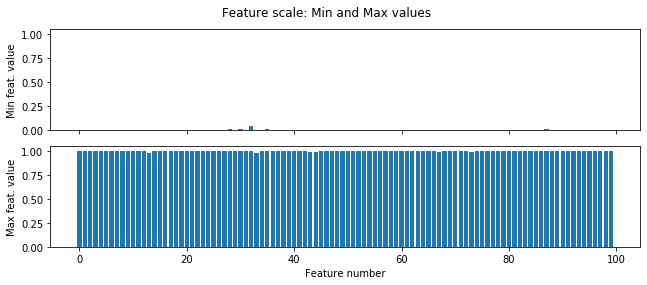

All features are already on the same scale (0-1)


In [8]:
# per data source, data already normalized
# confirm that features are on the same scale
fig, axs = plt.subplots(2,1, figsize=(9,4), sharex=True, sharey=True)
axs[0].bar(x=range(X_train.shape[1]), height=X_train.min())
axs[1].bar(x=range(X_train.shape[1]), height=X_train.max())
axs[0].set_ylabel('Min feat. value')
axs[1].set_ylabel('Max feat. value')
plt.xlabel('Feature number')
plt.suptitle('Feature scale: Min and Max values')
fig.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()
print('All features are already on the same scale (0-1)')

##### 2. Apply three techniques for feature selection: Filter methods, Wrapper methods, Embedded methods.

##### (1) Filter-based selection using Mutual Information

In [9]:
# select features based on the k highest mutual information scores
# try k = 48 features, about 50% of the features and matching backward selection method below
selector = SelectKBest(score_func=mutual_info_regression, k=48).fit(X_train, y_train) 
# selected features
mi_cols = X_train.columns[selector.get_support()].to_list()
print('selected features:\n{}'.format(mi_cols))
print('\n# selected features: {}'.format(len(mi_cols)))
X_train_mi = pd.DataFrame(selector.transform(X_train), columns=mi_cols)
X_test_mi = pd.DataFrame(selector.transform(X_test), columns=mi_cols)

selected features:
['population', 'racepctblack', 'racePctWhite', 'racePctHisp', 'agePct12t29', 'agePct16t24', 'numbUrban', 'medIncome', 'pctWInvInc', 'pctWPubAsst', 'medFamInc', 'perCapInc', 'blackPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctUnemployed', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'NumIlleg', 'PctIlleg', 'PctImmigRec8', 'PctImmigRec10', 'PctRecImmig5', 'PctLargHouseFam', 'PctLargHouseOccup', 'PctPersOwnOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctHousNoPhone', 'PctWOFullPlumb', 'MedRentPctHousInc', 'NumInShelters', 'NumStreet']

# selected features: 48


In [10]:
# linear regression on selected features
regressor = LinearRegression()
regressor.fit(X_train_mi, y_train)

# model evaluation 
# evaluate RMSE by 5-fold cross-validation
cv_scores_mi = cross_val_score(regressor, X_train_mi, y_train, scoring='neg_mean_squared_error', cv=10)
print('cross-validated Train RMSE: {}'.format(np.sqrt(-cv_scores_mi)))
print('mean cross-validated Train RMSE: {:.3f}'.format(np.sqrt(-cv_scores_mi).mean()))

# evaluate adjusted R2
R2_mi = regressor.score(X_train_mi, y_train)
ntrain = X_train_mi.shape[0]
ptrain = X_train_mi.shape[1]
adjR2_mi = 1-(1-R2_mi)*(ntrain-1)/(ntrain-ptrain-1)
print('Train adjusted R2: {:.2f}'.format(adjR2_mi))

cross-validated Train RMSE: [0.12691559 0.13031906 0.14850459 0.15689966 0.16314634 0.12720731
 0.12379194 0.1286664  0.15008129 0.13513189]
mean cross-validated Train RMSE: 0.139
Train adjusted R2: 0.66


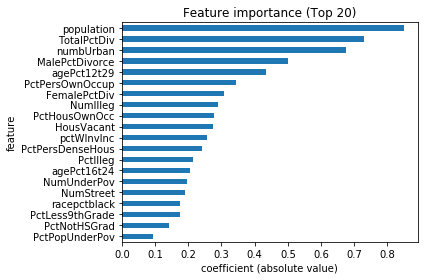

In [11]:
# evaluate feature importance based on coefficients
feat_imp_mi = pd.Series(index = X_train_mi.columns, data = np.abs(regressor.coef_))

# plot feature importantance/coefficients
fig, ax = plt.subplots()
feat_imp_mi.sort_values(ascending=False).head(20).plot(kind='barh', ax=ax)
ax.invert_yaxis()
ax.set_ylabel('feature')
ax.set_xlabel('coefficient (absolute value)')
ax.set_title('Feature importance (Top 20)')
fig.tight_layout()
plt.show()

In [12]:
# prediction
y_pred_mi = regressor.predict(X_test_mi)
RMSE_test_mi = np.sqrt(mean_squared_error(y_test, y_pred_mi))
print('Test RMSE: {:.3f}'.format(RMSE_test_mi))

Test RMSE: 0.134


##### (2) Wrapper method: Backward selection using Recursive Feature Elimination

In [13]:
# feature ranking with RFE and cross-validated selection of the best number of features
regressor = LinearRegression()
selector = RFECV(regressor, step=1, cv=10).fit(X_train, y_train) 
# selected features
rfe_cols = X_train.columns[selector.support_].to_list()
print('selected features:\n{}'.format(rfe_cols))
print('\n# selected features: {}'.format(len(rfe_cols)))

selected features:
['population', 'racepctblack', 'agePct12t29', 'numbUrban', 'medIncome', 'pctWWage', 'pctWInvInc', 'pctWSocSec', 'pctWRetire', 'medFamInc', 'perCapInc', 'whitePerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctEmploy', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PctKids2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctRecentImmig', 'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'HousVacant', 'PctHousOwnOcc', 'OwnOccLowQuart', 'OwnOccHiQuart', 'RentLowQ', 'RentHighQ', 'MedRent', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn']

# selected features: 48


In [14]:
# model evaluation 
# evaluate RMSE by cross-validation
cv_scores_rfe = cross_val_score(selector, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print('cross-validated Train RMSE: {}'.format(np.sqrt(-cv_scores_rfe)))
print('mean cross-validated Train RMSE: {:.3f}'.format(np.sqrt(-cv_scores_rfe).mean()))

# evaluate adjusted R2
R2_rfe = selector.score(X_train, y_train)
ntrain = X_train.shape[0]
ptrain = np.sum(selector.support_)
adjR2_rfe = 1-(1-R2_rfe)*(ntrain-1)/(ntrain-ptrain-1)
print('Train adjusted R2: {:.2f}'.format(adjR2_rfe))

cross-validated Train RMSE: [0.12494297 0.13091153 0.14788187 0.15084844 0.16159184 0.12538221
 0.12075717 0.12815165 0.1524621  0.13506248]
mean cross-validated Train RMSE: 0.138
Train adjusted R2: 0.68


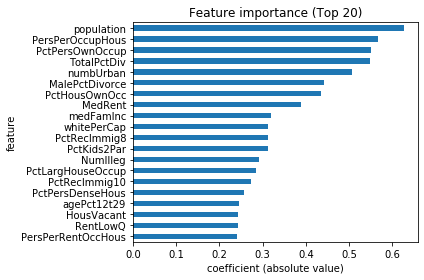

In [15]:
# evaluate feature importance based on coefficients
feat_imp_rfe = pd.Series(index = X_train.columns[selector.support_], data = np.abs(selector.estimator_.coef_))

# plot feature importantance/coefficients
fig, ax = plt.subplots()
feat_imp_rfe.sort_values(ascending=False).head(20).plot(kind='barh', ax=ax)
ax.invert_yaxis()
ax.set_ylabel('feature')
ax.set_xlabel('coefficient (absolute value)')
ax.set_title('Feature importance (Top 20)')
fig.tight_layout()
plt.show()

In [16]:
# prediction
y_pred_rfe = selector.predict(X_test)
RMSE_test_rfe = np.sqrt(mean_squared_error(y_test, y_pred_rfe))
print('Test RMSE: {:.3f}'.format(RMSE_test_rfe))

Test RMSE: 0.131


##### (3) Embedded method: Lasso regression

In [17]:
# Lasso linear model. The best model is selected by cross-validation
lasso = LassoCV(cv=10, random_state=0).fit(X_train, y_train)
print('alpha: {}'.format(lasso.alpha_))

# selected features
lasso_cols = X_train.columns[lasso.coef_!=0].to_list()
print('\nselected features:\n{}'.format(lasso_cols))
print('\n# selected features: {}'.format(len(lasso_cols)))

alpha: 4.0532760291270754e-05

selected features:
['householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian', 'racePctHisp', 'agePct12t29', 'agePct65up', 'numbUrban', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov', 'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctEmplProfServ', 'PctOccupManu', 'PctOccupMgmtProf', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'PctFam2Par', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig8', 'PctSpeakEnglOnly', 'PctNotSpeakEnglWell', 'PctLargHouseOccup', 'PersPerOccupHous', 'PersPerOwnOccHous', 'PersPerRentOccHous', 'PctPersOwnOccup', 'PctPersDenseHous', 'Pct

In [18]:
# model evaluation      
# evaluate RMSE by cross-validation
cv_scores_lasso = cross_val_score(lasso, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print('cross-validated Train RMSE: {}'.format(np.sqrt(-cv_scores_lasso)))
print('mean cross-validated Train RMSE: {:.3f}'.format(np.sqrt(-cv_scores_lasso).mean()))

# evaluate adjusted R2
R2_lasso = lasso.score(X_train, y_train)
ntrain = X_train.shape[0]
ptrain = np.sum(lasso.coef_!=0)
adjR2_lasso = 1-(1-R2_lasso)*(ntrain-1)/(ntrain-ptrain-1)
print('Train adjusted R2: {:.2f}'.format(adjR2_lasso))

cross-validated Train RMSE: [0.12701505 0.12883436 0.14582794 0.15342114 0.16003772 0.12606863
 0.11915896 0.12925666 0.15063447 0.13521828]
mean cross-validated Train RMSE: 0.138
Train adjusted R2: 0.68


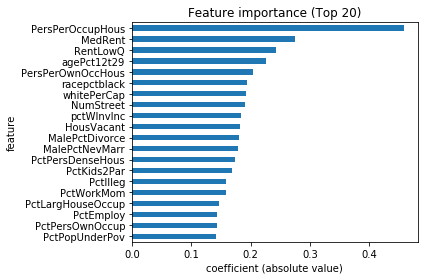

In [19]:
# evaluate feature importance based on coefficients
feat_imp_lasso = pd.Series(index = X_train.columns, data = np.abs(lasso.coef_))

# plot feature importantance/coefficients
fig, ax = plt.subplots()
feat_imp_lasso.sort_values(ascending=False).head(20).plot(kind='barh', ax=ax)
ax.invert_yaxis()
ax.set_ylabel('feature')
ax.set_xlabel('coefficient (absolute value)')
ax.set_title('Feature importance (Top 20)')
fig.tight_layout()
plt.show()

In [20]:
# prediction
y_pred_lasso = lasso.predict(X_test)
RMSE_test_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print('Test RMSE: {:.3f}'.format(RMSE_test_lasso))

Test RMSE: 0.131


##### Baseline: no additional feature selection

In [21]:
# linear regression model using all features; no additional selection after preprocessing
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print('# features: {}'.format(X_train.shape[1]))

# features: 100


In [22]:
# model evaluation 
# evaluate RMSE by cross-validation
cv_scores_all = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error', cv=10)
print('cross-validated Train RMSE: {}'.format(np.sqrt(-cv_scores_all)))
print('mean cross-validated Train RMSE: {:.3f}'.format(np.sqrt(-cv_scores_all).mean()))

# evaluate adjusted R2
R2_all = regressor.score(X_train, y_train)
ntrain = X_train.shape[0]
ptrain = X_train.shape[1]
adjR2_all = 1-(1-R2_all)*(ntrain-1)/(ntrain-ptrain-1)
print('Train adjusted R2: {:.2f}'.format(adjR2_all))

cross-validated Train RMSE: [0.12537605 0.12997093 0.1468093  0.15316818 0.1619665  0.12565712
 0.12011993 0.12887814 0.15246135 0.13524602]
mean cross-validated Train RMSE: 0.138
Train adjusted R2: 0.68


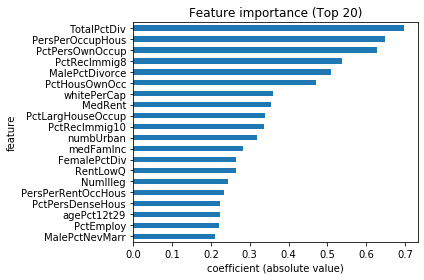

In [23]:
# evaluate feature importance based on coefficients
feat_imp_all = pd.Series(index = X_train.columns, data = np.abs(regressor.coef_))

# plot feature importantance/coefficients
fig, ax = plt.subplots()
feat_imp_all.sort_values(ascending=False).head(20).plot(kind='barh', ax=ax)
ax.invert_yaxis()
ax.set_ylabel('feature')
ax.set_xlabel('coefficient (absolute value)')
ax.set_title('Feature importance (Top 20)')
fig.tight_layout()
plt.show()

In [24]:
# prediction
y_pred_all = regressor.predict(X_test)
RMSE_test_all = np.sqrt(mean_squared_error(y_test, y_pred_all))
print('Test RMSE: {:.3f}'.format(RMSE_test_all))

Test RMSE: 0.132


##### 3. Describe your findings.

In [25]:
# make summary dataframe of model results 
summary_df = pd.DataFrame({
    'No additional selection':['n/a', np.sqrt(-cv_scores_all).mean(), adjR2_all, X_train.shape[1], RMSE_test_all],
    'Filter method':['Mutual Information', np.sqrt(-cv_scores_mi).mean(), adjR2_mi, len(mi_cols), RMSE_test_mi],
    'Wrarpper method':['Backward selection/RFE', np.sqrt(-cv_scores_rfe).mean(), adjR2_rfe, len(rfe_cols), RMSE_test_rfe],
    'Embedded method':['Lasso', np.sqrt(-cv_scores_lasso).mean(), adjR2_lasso, len(lasso_cols), RMSE_test_lasso]
    }, index=['Method', 'RMSE Train (CV-10)', 'adjR2 Train', '# selected features', 'RMSE Test'])
summary_df

,No additional selection,Filter method,Wrarpper method,Embedded method
Method,n/a,Mutual Information,Backward selection/RFE,Lasso
RMSE Train (CV-10),0.137965,0.139066,0.137799,0.137547
adjR2 Train,0.680775,0.662764,0.678167,0.681251
# selected features,100,48,48,83
RMSE Test,0.131692,0.133579,0.130854,0.131049


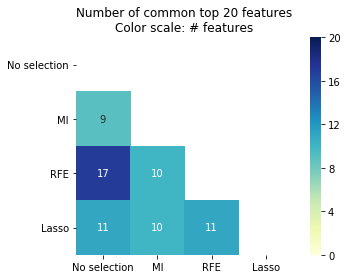

Common selected top features using mutual information, RFE, and Lasso:
{'PctPersOwnOccup', 'HousVacant', 'PctPersDenseHous', 'agePct12t29', 'MalePctDivorce'}


In [26]:
# evaluate feature importance based on coefficients
# find top 20 features for each models/feature selection techniques
top20mi = feat_imp_mi.sort_values(ascending=False).head(20).index.to_list()
top20rfe = feat_imp_rfe.sort_values(ascending=False).head(20).index.to_list()
top20lasso = feat_imp_lasso.sort_values(ascending=False).head(20).index.to_list()
top20all = feat_imp_all.sort_values(ascending=False).head(20).index.to_list()

# find overlapping featurees across models/feature selection techniques
overlap_matrix = pd.DataFrame({'No selection': [len(set(top20all).intersection(set(top20all))), len(set(top20all).intersection(set(top20mi))), len(set(top20all).intersection(set(top20rfe))), len(set(top20all).intersection(set(top20lasso)))],
 'MI': [len(set(top20mi).intersection(set(top20all))), len(set(top20mi).intersection(set(top20mi))), len(set(top20mi).intersection(set(top20rfe))), len(set(top20mi).intersection(set(top20lasso)))],
 'RFE': [len(set(top20rfe).intersection(set(top20all))), len(set(top20rfe).intersection(set(top20mi))), len(set(top20rfe).intersection(set(top20rfe))), len(set(top20rfe).intersection(set(top20lasso)))],
 'Lasso': [len(set(top20lasso).intersection(set(top20all))), len(set(top20lasso).intersection(set(top20mi))), len(set(top20lasso).intersection(set(top20rfe))), len(set(top20lasso).intersection(set(top20lasso)))],
 }, index=['No selection', 'MI', 'RFE', 'Lasso'])

# visualize feature overlap between models/feature selection techniques
mask = np.zeros_like(overlap_matrix)
mask[np.triu_indices_from(mask)] = True
fig = plt.figure()
ax = fig.gca()
sns.heatmap(overlap_matrix, vmin=0, vmax=20, mask=mask, annot=True, square=True, cmap='YlGnBu', fmt='.0f', ax=ax)
ax.set_title('Number of common top 20 features\nColor scale: # features')
plt.show()

print('Common selected top features using mutual information, RFE, and Lasso:\n{}'.format((set(top20mi).intersection(set(top20rfe))).intersection(set(top20lasso))))

##### Findings:
3 techniques for feature selection were applied: Filter method, Wrapper method, and Embedded method.
<ul>
    <li>Filter method: Mutual Information score was used for feature selection. Here, k=48 highest scores were selected; k was chosen to match the number of features selected by backward selection/RFE as comparison. (Using Mutual Information, k=48 performed better than k=20)</li>
    <li>Wrapper method: Backward selection by RFE, with cross-validated selection of the best number of features (48 features)</li>
    <li>Embedded method: Lasso regression, with cross-validated selection of the best model (83 selected features; coefficients of 17 features were set to 0)</li>
</ul>

Model results and feature importance:
<ul>
    <li>Overall, model performance, as assessed by RMSE and adjusted R2, was similar/comparable between the 3 feature selection techniques</li>
    <li>Lasso produced the lowest RMSE and highest adjusted R2, despite having the largest number of features</li>
    <li>The model with feature selection by Mutual information could be further tuned, as the selection of k highest scores was arbitrary. However, as described above, model performance was similar to RFE and Lasso models, both of which were tuned via cross-validation</li>
    <li>All 3 feature selection techniques reduced model complexity (decreased # features) with minimal change in accuracy</li>
    <li>The 3 feature selection techniques identified a similar set of top 20 features, with overlap of ~50% (~10 out of the top 20 features were the same across any 2 models)</li>
    <li>Across all 3 models/feature selection techniques, common selected top features are 'PctPersOwnOccup', 'HousVacant', 'PctPersDenseHous', 'agePct12t29', 'MalePctDivorce'</li>